Proyecto Mecánica de Fluidos Grupo 13

In [17]:
import scipy.io as sio
import numpy as np
data = sio.loadmat('data.mat')
x = data['x']
y = data['y']
u = data['u']
v = data['v']
# Arrays de los datos
x_array = np.array(data['x'])
y_array = np.array(data['y'])
u_array = np.array(data['u'])
v_array = np.array(data['v'])

Ver las dimensiones de cada matriz para ver si se importaron bien los datos

In [9]:
print(x_array.shape)
print(y_array.shape)
print(u_array.shape)
print(v_array.shape)

(116, 15)
(116, 15)
(116, 15, 39999)
(116, 15, 39999)


Diccionario con parámetros del agua en las condiciones del experimento (Fuente: Frank M. White Fluid Mechanics 7th Edition page 27 Table 1.4 "Viscosity and kinematic viscosity of eight fluids at 1 atm and 20°C")

In [5]:
agua = {"densidad": 998,  # kg/m3
        "viscodidad dinámica": 1 * (10 ** -3), # kg/(m * s)
        "viscocidad cinemática": 1.01 * (10 ** -6), # m2/s
        "diametro": 0.021} # m

Gráfico de los puntos del espacio

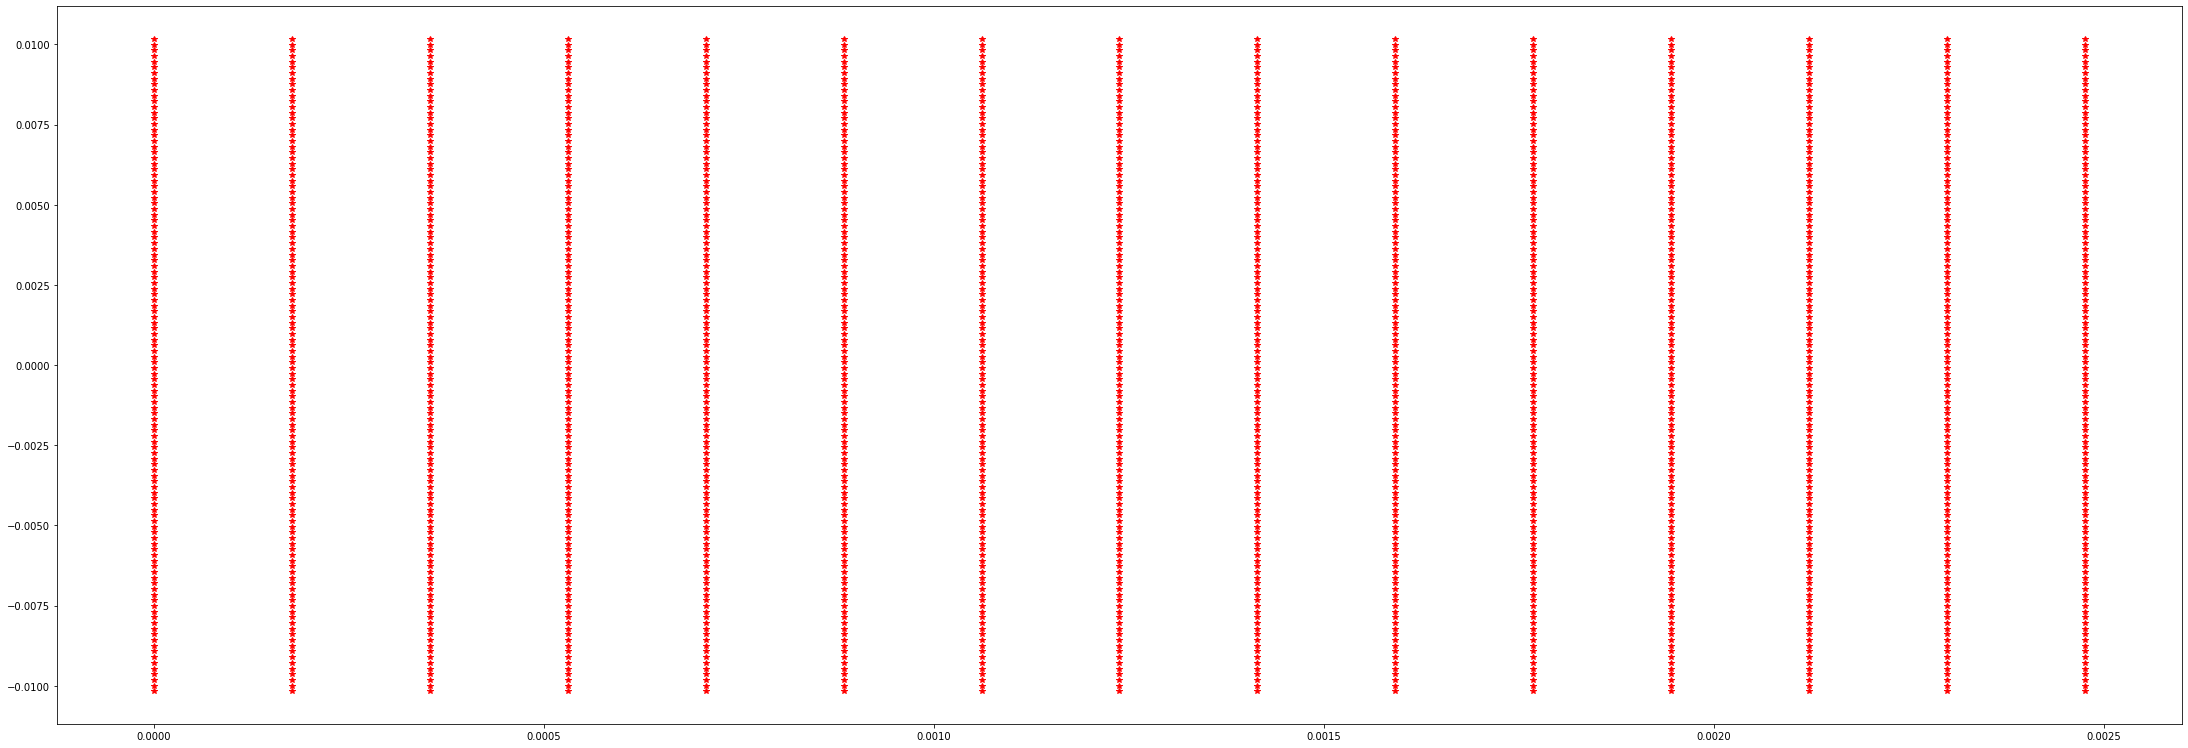

In [10]:
import matplotlib.pyplot as plt
# Vamos a graficar todos los puntos muestreados

plt.rcParams["figure.figsize"] = [30.50, 10.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(x,y,'r*')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


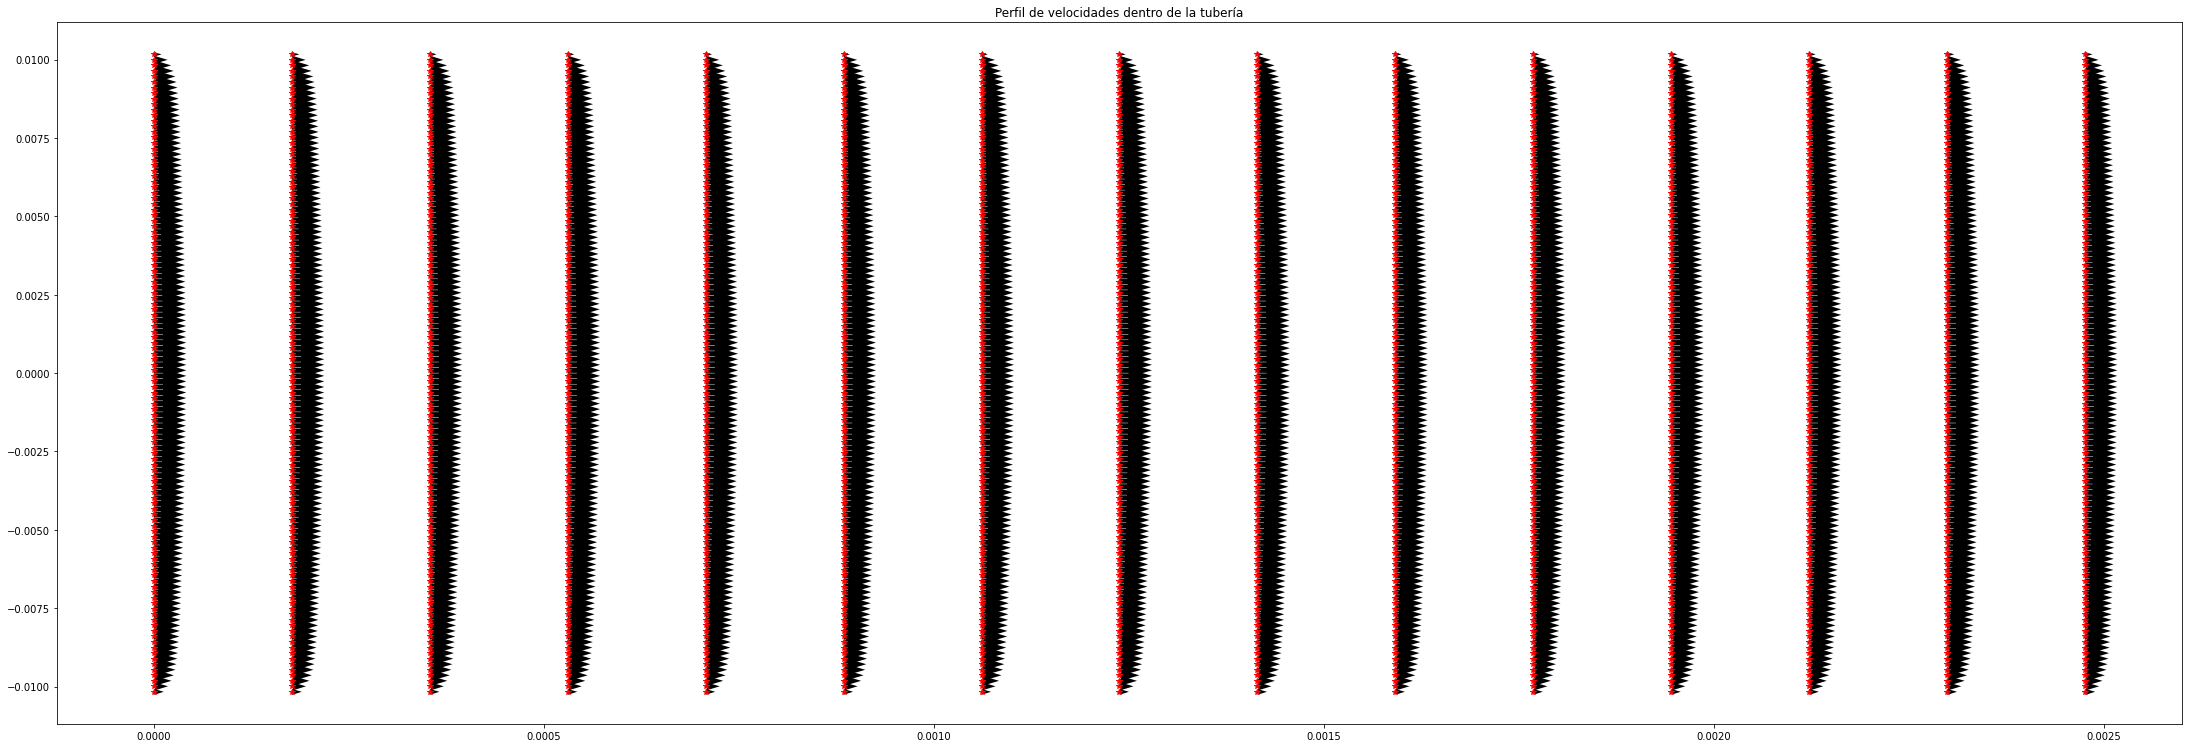

In [65]:
long_promedio = [] # Velocidades longitudinales promedio en cada punto
vert_promedio = [] # Velocidades transversales promedio en cada punto
for i in range(116):
    lista_1 = []
    lista_2 = []
    for j in range(15):
        lista_1.append(np.mean(np.array(u[i][j])))
        lista_2.append(np.mean(np.array(v[i][j])))

    long_promedio.append(lista_1)
    vert_promedio.append(lista_2)

plt.quiver(x, y, long_promedio, vert_promedio) # Velocidad media de cada punto en el espacio
plt.plot(x,y,'r*') # Puntos xy del espacio muestrado
plt.title("Perfil de velocidades dentro de la tubería")
plt.show()

1) Verificar presencia de vectores erróneos (Eliminación de outliers, buscar información en internet, está más relacionado con Machine Learning que con mecánica de fluidos)

2a) Calcular velocidades longitudinales y transversales medias 

In [80]:
# Velocidad longitudinal promedio
u_promedio = np.mean(u_array) # Un valor característico de todo el flujo
print(f"La velocidad longitudinal promedio es {u_promedio} m/s") # Debiese darnos 0.279 m/s
# Velocidad transversal promedio
v_promedio = np.mean(v_array) # Un valor específico de todo el flujo
print(f"La velocidad transversal promedio es {v_promedio} m/s") 

mean_u_t = u_array.mean(axis=(0,1)) # Promedio de la velocidad longitudinal en cada tiempo (lista de len = 39999)
mean_v_t = v_array.mean(axis=(0,1)) # Promedio de la velocidad transversal en cada tiempo (lista de len = 39999)

mean_u_xy = u_array.mean(axis=2) # Promedio de la velocidad longitudinal en cada punto (lista de 116 x 15)
mean_v_xy = v_array.mean(axis=2) # Promedio de la velocidad transversal en cada punto (lista de 116 x 15)

# Aprovechamos también de hacer la descomposición de Reynolds para posteriormente graficar
u_prima = mean_u_t - u_promedio
v_prima = mean_v_t - v_promedio

vel = np.linalg.norm([mean_u_t, mean_v_t], axis=0)

La velocidad longitudinal promedio es 0.28399841705259005 m/s
La velocidad transversal promedio es -0.00023552504234347524 m/s


$\bar{u} = 0.28399841705259005$ m/s
$\bar{v} = -0.00023552504234347524$ m/s

Gráficos de la velocidad

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


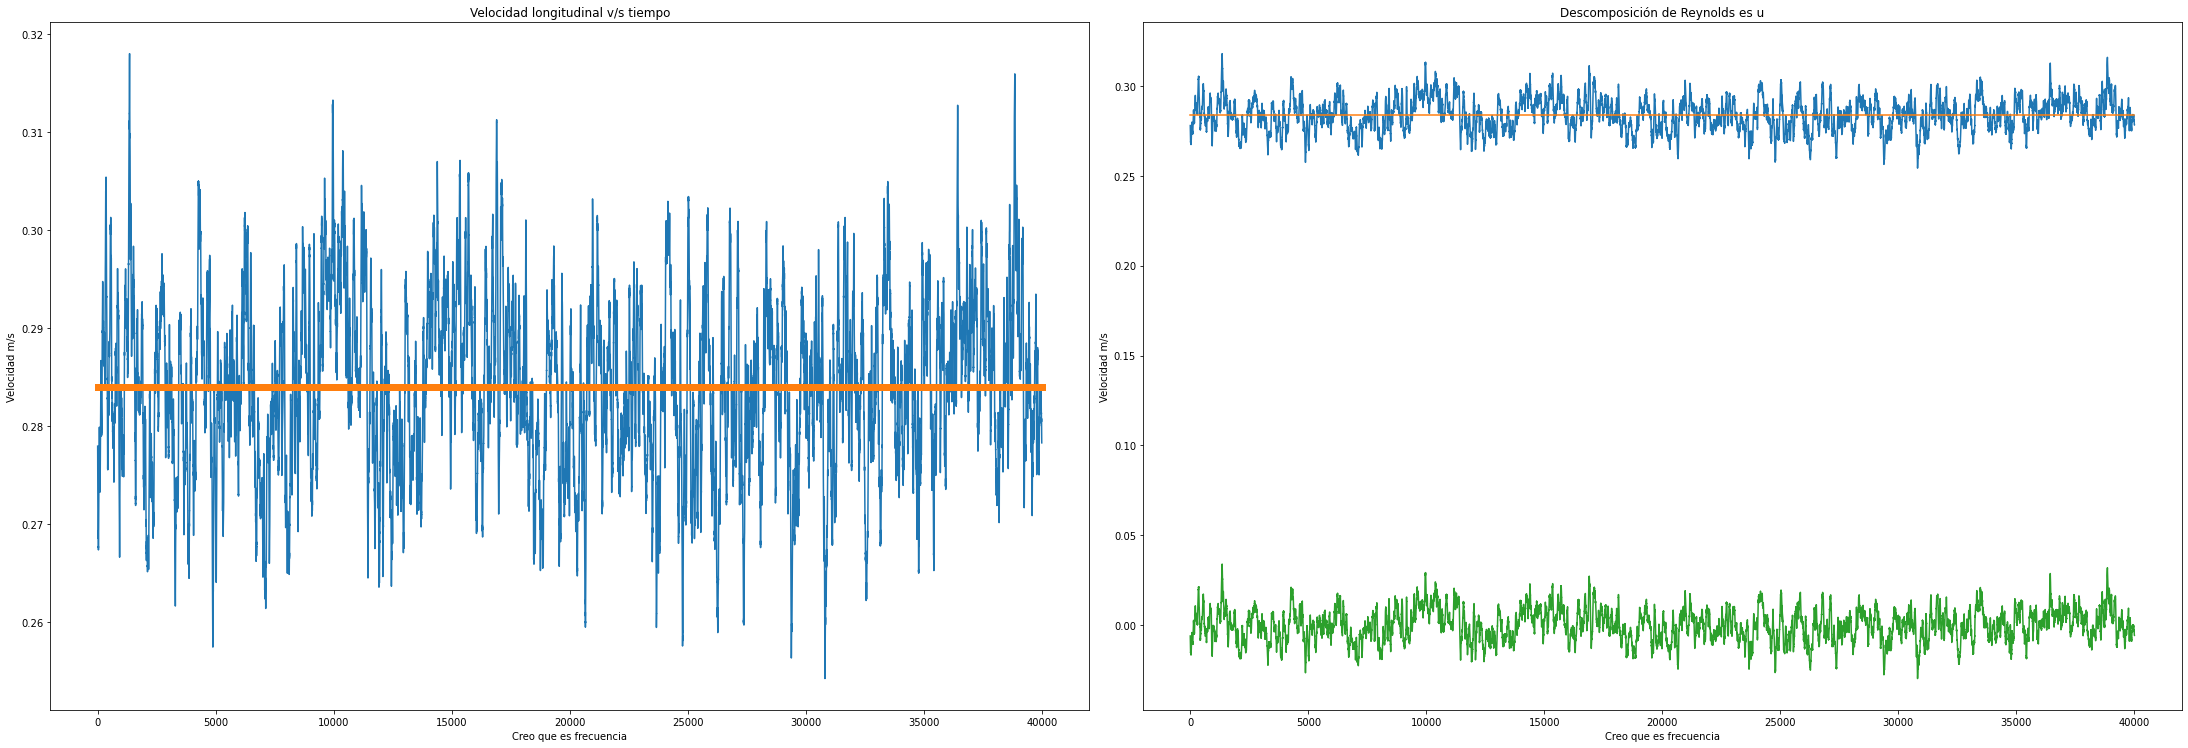

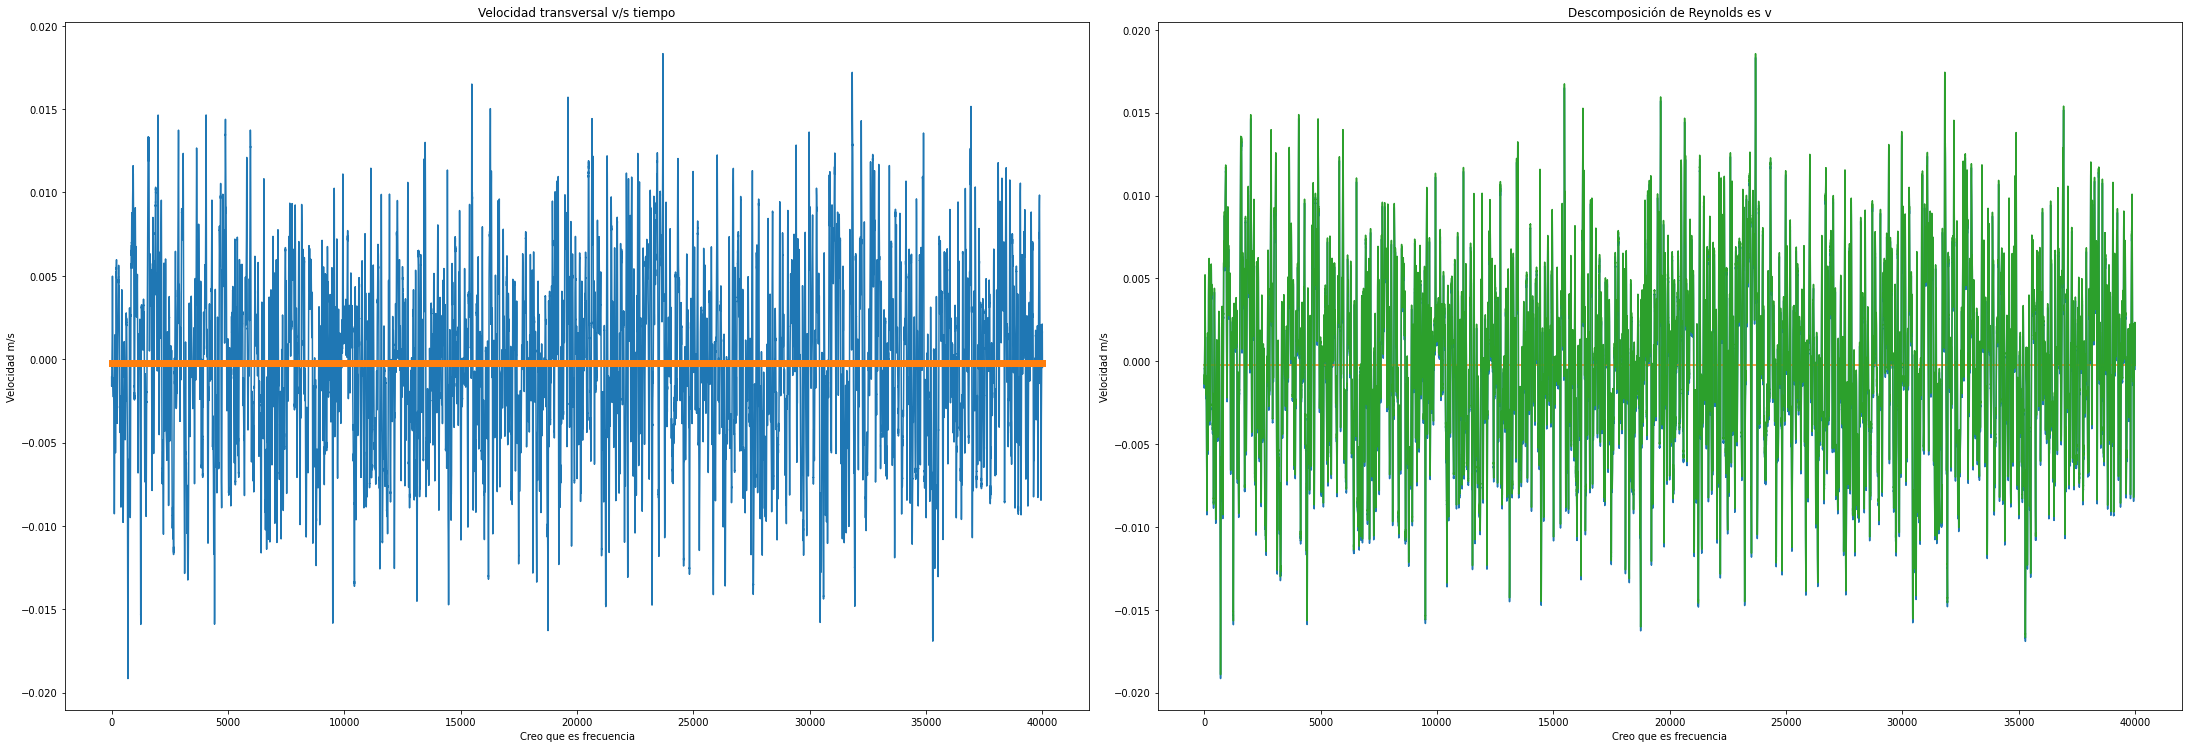

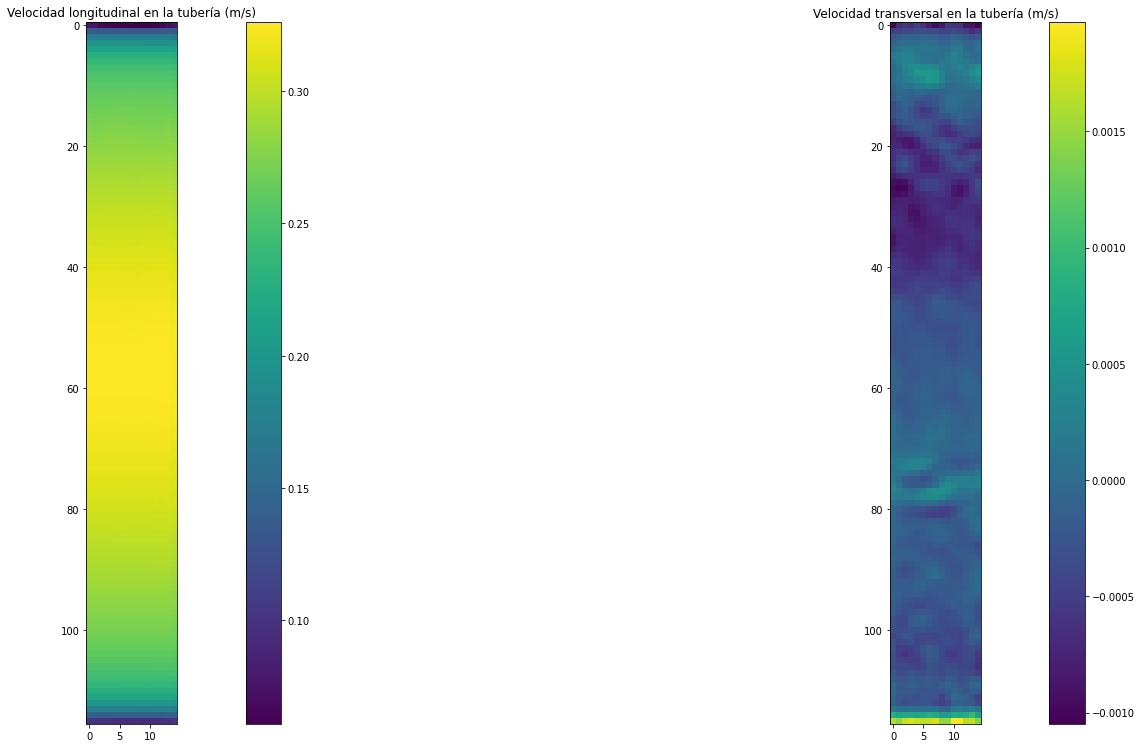

In [75]:
# Gráfico u(t) y mean(u) + u'
plt.subplot(1, 2, 1)
plt.plot(mean_u_t)
plt.plot([0,39999], [u_promedio, u_promedio], linewidth=7)
plt.xlabel("Creo que es frecuencia")
plt.ylabel("Velocidad m/s")
plt.title("Velocidad longitudinal v/s tiempo")

plt.subplot(1, 2, 2)
plt.plot(list(u_prima + u_promedio))
plt.plot([0,39999], [u_promedio, u_promedio])
plt.plot(list(u_prima))
plt.xlabel("Creo que es frecuencia")
plt.ylabel("Velocidad m/s")
plt.title("Descomposición de Reynolds es u")

plt.show()

# Gráfico v(t) y mean(v) + v'
plt.subplot(1, 2, 1)
plt.plot(mean_v_t)
plt.plot([0,39999], [v_promedio, v_promedio], linewidth=7)
plt.xlabel("Creo que es frecuencia")
plt.ylabel("Velocidad m/s")
plt.title("Velocidad transversal v/s tiempo")

# Esto no me está funcionando
plt.subplot(1, 2, 2)
plt.plot(list(v_prima + v_promedio))
plt.plot([0,39999], [v_promedio, v_promedio])
plt.plot(list(v_prima))
plt.xlabel("Creo que es frecuencia")
plt.ylabel("Velocidad m/s")
plt.title("Descomposición de Reynolds es v")

plt.show()

# Mapas de calor de la velocidad

plt.subplot(1, 2, 1)
plt.imshow(mean_u_xy)
plt.colorbar()
plt.title("Velocidad longitudinal en la tubería (m/s)")

plt.subplot(1, 2, 2)
plt.imshow(mean_v_xy)
plt.colorbar()
plt.title("Velocidad transversal en la tubería (m/s)")
plt.show()

Ahora que se calculó la velocidad longitudinal media, se puede calcular el número de Reynolds del flujo usando como longitud característica el diámetro de la tubería ($Re = \frac{UD}{\nu}$)

In [13]:
reynolds_number = (u_promedio * agua["diametro"]) / agua["viscocidad cinemática"]
print(f"El número de Reynolds del flujo es {reynolds_number}")
# Da un npumero muy bajo para ser un flujo turbulento, cuando veamos el espectro de energía chequear este valor

El número de reynolds del flujo es 5904.917582281576


$$Re = \frac{UD}{\nu} = 5904.917582281576$$

2.2) Calcular el campo de vorticidad medio. Recordar que $$\omega_{z} = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}$$Es la única que debemos calcular porque el flujo es 2D

In [14]:
vorticidades = []
for i in range(116):
    for j in range(15):
        omega_z = np.gradient(v[i][j],x[i][j]) - np.gradient(u[i][j],y[i][j])
        if not np.inf in omega_z:
            vorticidades.append(omega_z)

vorticidad_media = np.mean(np.array(vorticidades))
print(f"La vorticidad media es {vorticidad_media}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:1235: RuntimeWarning: divide by zero encountered in divide
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:1256: RuntimeWarning: divide by zero encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:1263: RuntimeWarning: divide by zero encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


La vorticidad media es -9.452768351595751e-05


3) Tensiones de corte en la pared

4) Componentes del tensor de tensiones de Reynolds

Tensión xy: 9.095288091032696e-17
Tensión xx: 1.409769654110068e-15
Tensión yy: -7.730994877377792e-16
El tensor de Reynolds es [[[ 0.03437028  0.07398772  0.11116107 ...  0.11116107  0.07398772
    0.03437028]
  [ 0.00151936  0.00109148 -0.002771   ...  0.01850116  0.01105663
    0.00475428]]

 [[ 0.00151936  0.00109148 -0.002771   ...  0.01850116  0.01105663
    0.00475428]
  [ 0.00021017  0.00018733 -0.0002973  ... -0.0002973   0.00018733
    0.00021017]]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


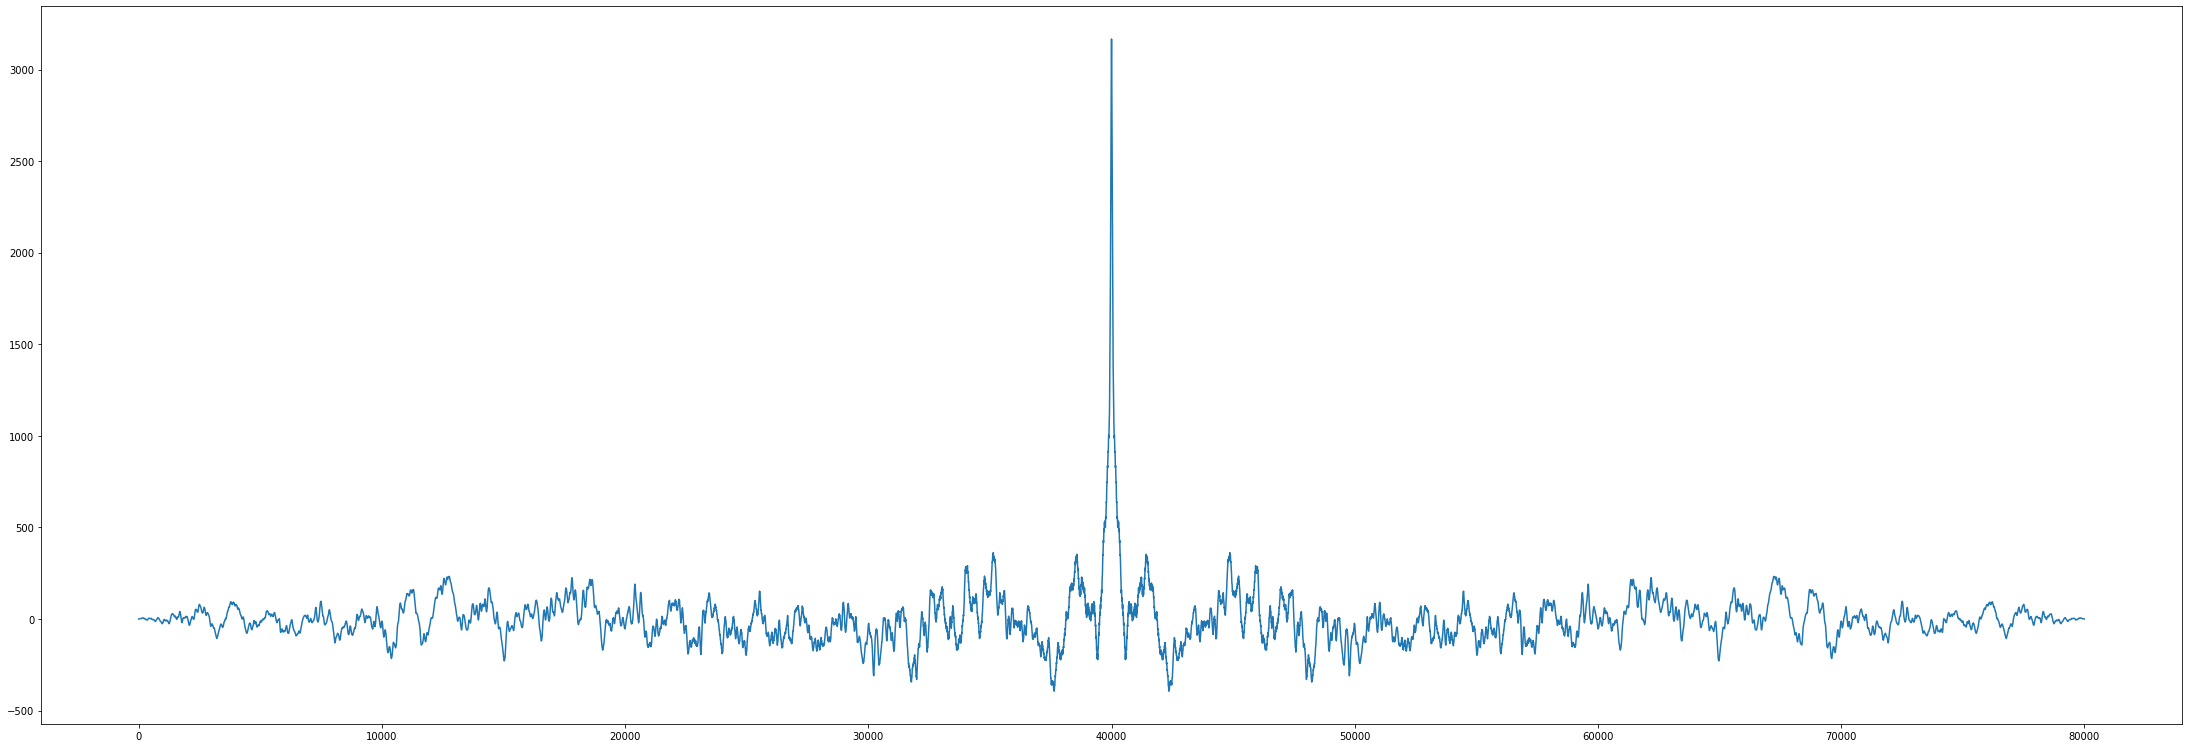

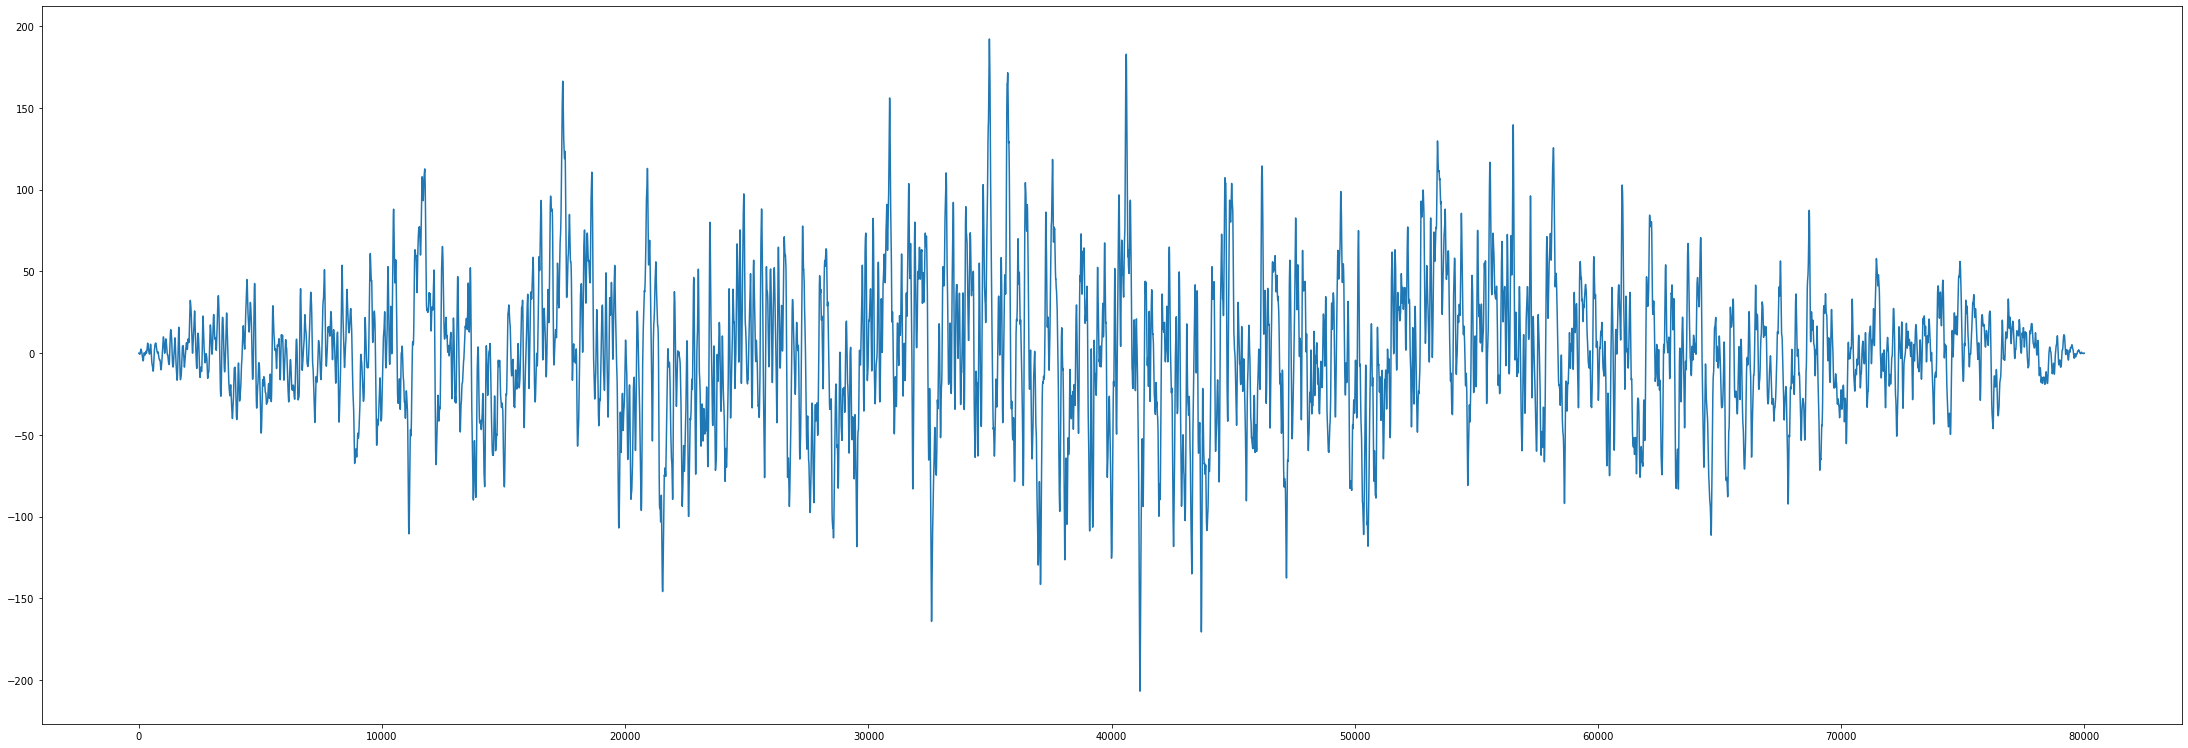

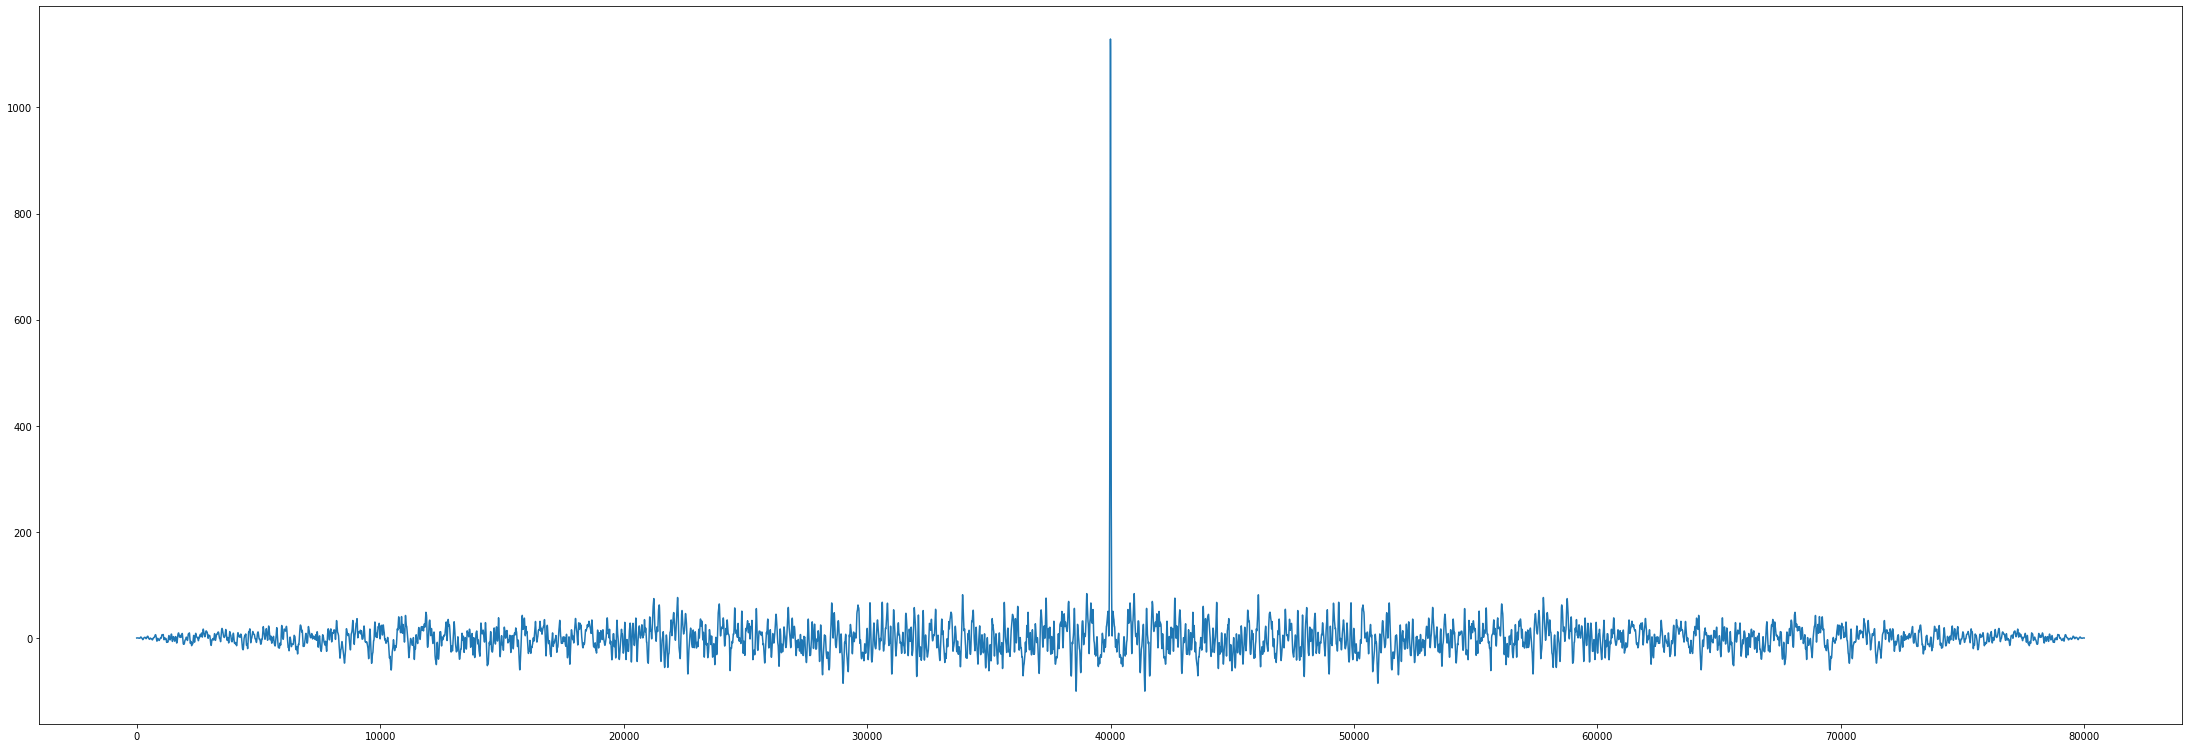

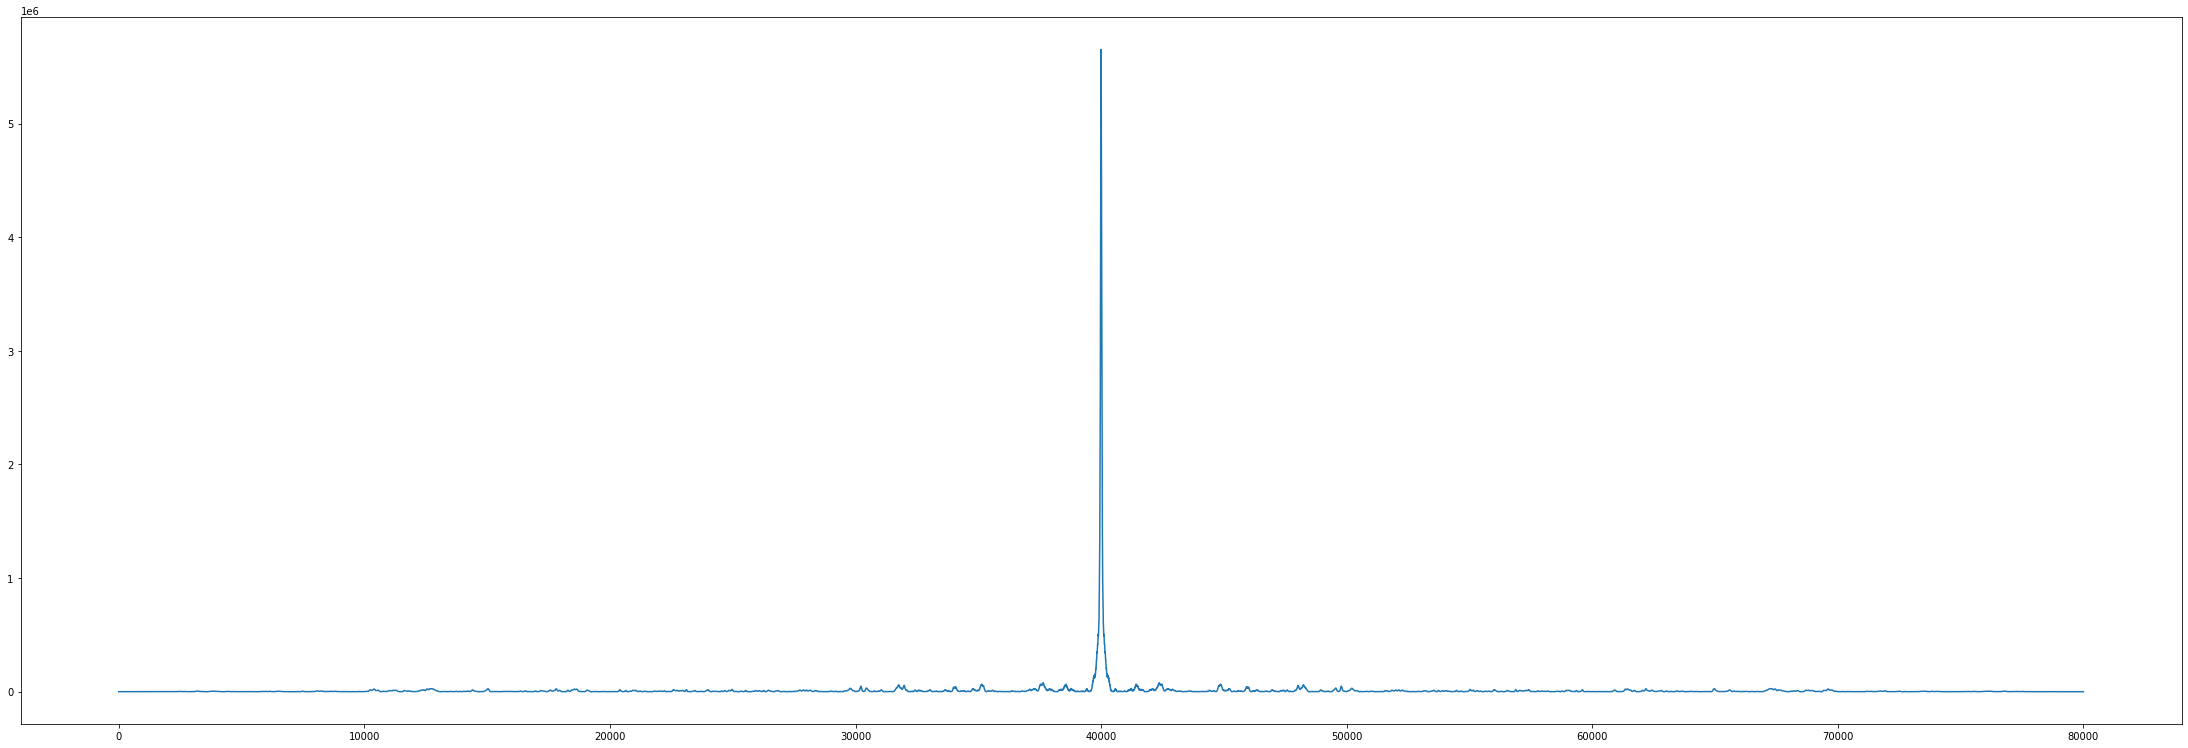

In [51]:
reynolds_xy = np.correlate(u_prima, v_prima, "full") * agua["densidad"]
reynolds_xx = np.correlate(u_prima, u_prima, "full") * agua["densidad"]
reynolds_yy = np.correlate(v_prima, v_prima, "full") * agua["densidad"]

print(f"Tensión xy: {np.mean(reynolds_xy)}")
print(f"Tensión xx: {np.mean(reynolds_xx)}")
print(f"Tensión yy: {np.mean(reynolds_yy)}")

tensor_reynolds = np.array([[reynolds_xx, reynolds_xy],
                            [reynolds_xy, reynolds_yy]])

print(f"El tensor de Reynolds es {tensor_reynolds}")

plt.plot(reynolds_xx)
plt.show()
plt.plot(reynolds_xy)
plt.show()
plt.plot(reynolds_yy)
plt.show()

TKE = 0.5 * (reynolds_yy**2 + reynolds_xx ** 2)
plt.plot(TKE)
plt.show()

$$
\tau_{ij} = \begin{bmatrix}
    \tau_{xx} & \tau_{xy} \\
    \tau_{yx} & \tau_{yy}
   \end{bmatrix}
 =  \begin{bmatrix}
    0 & 0 \\
    0 & 0
   \end{bmatrix}
$$

Vamos a graficar la velocidad en un cierto punto y su descomposición de Reynolds